In [149]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from datetime import datetime

In [150]:
def convert_to_datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S') 

file_path='./homesensors_2021.csv'
readings = np.genfromtxt(file_path, delimiter=",",skip_header=1,)
date_strings = np.genfromtxt(file_path, delimiter=",",skip_header=1,usecols=0,dtype=str)
print(date_strings)

['2021-01-02 00:00:00' '2021-01-02 00:30:00' '2021-01-02 01:00:00' ...
 '2021-12-31 22:30:00' '2021-12-31 23:00:00' '2021-12-31 23:30:00']


In [151]:
date_datetimes = [convert_to_datetime(date) for date in date_strings]

dates = [mdates.date2num(date) for date in date_datetimes]

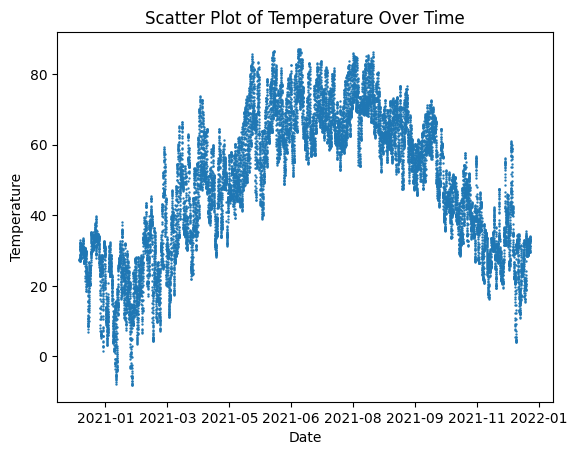

In [152]:
temps = readings[:,20]
plt.scatter(dates,temps,s=0.5)
plt.title('Scatter Plot of Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()


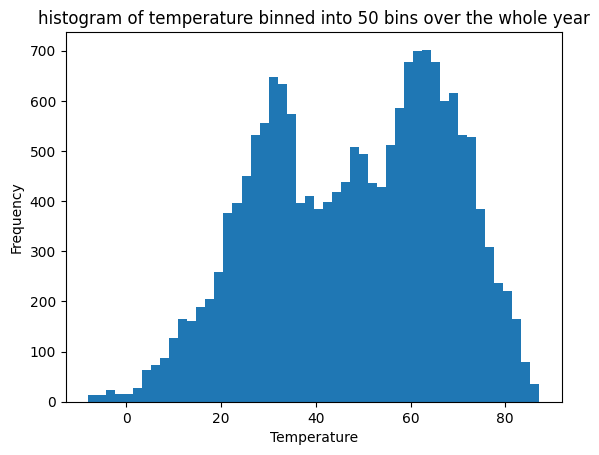

In [153]:
plt.hist(temps,bins=50)
plt.title('histogram of temperature binned into 50 bins over the whole year')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

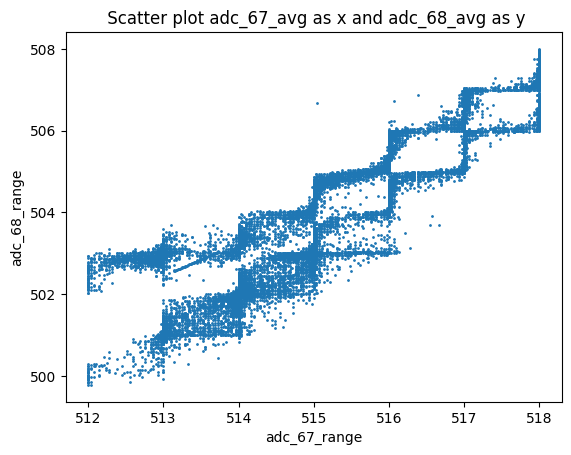

In [154]:
adc_67_avg = readings[:,29]
adc_68_avg = readings[:,30] 

adc_67_range = adc_67_avg[(adc_67_avg >= 512) & (adc_67_avg <= 518)]
adc_68_range = adc_68_avg[(adc_67_avg >= 512) & (adc_67_avg <= 518)]

plt.scatter(adc_67_range, adc_68_range,s=1)
plt.title(' Scatter plot adc_67_avg as x and adc_68_avg as y')
plt.xlabel('adc_67_range')
plt.ylabel('adc_68_range')
plt.show()

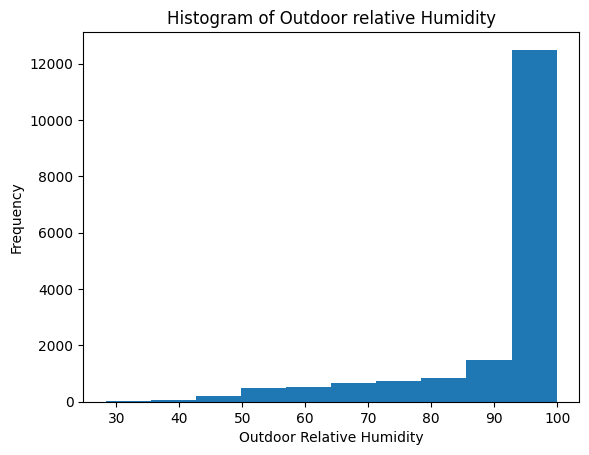

In [155]:
outside_humidity = readings[:,10]
plt.hist(outside_humidity)
plt.title('Histogram of Outdoor relative Humidity')
plt.xlabel('Outdoor Relative Humidity')
plt.ylabel('Frequency')
plt.show()

Stepping pattern is caused because the data does not change continously but increase in discrete values.

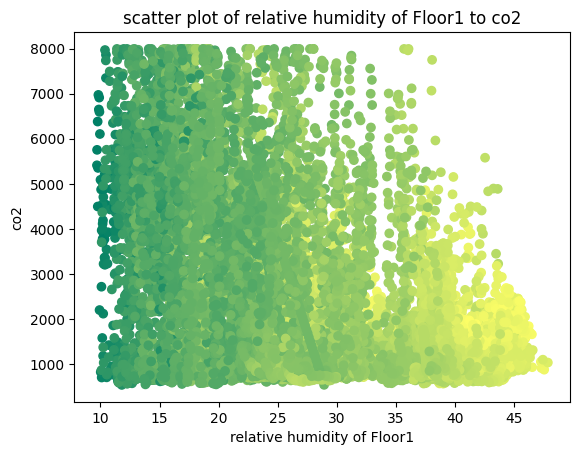

In [156]:
rh_4 = readings[:,11]
co2 = readings[:,23]
temp8 = readings[:,20]
plt.scatter(rh_4,co2,c=temp8,cmap='summer')
plt.title('scatter plot of relative humidity of Floor1 to co2')
plt.xlabel('relative humidity of Floor1')
plt.ylabel('co2')
plt.show()

The distribution is not normal as it is not according to the Bell curve. The measurement is biased depending on the time the data is collected

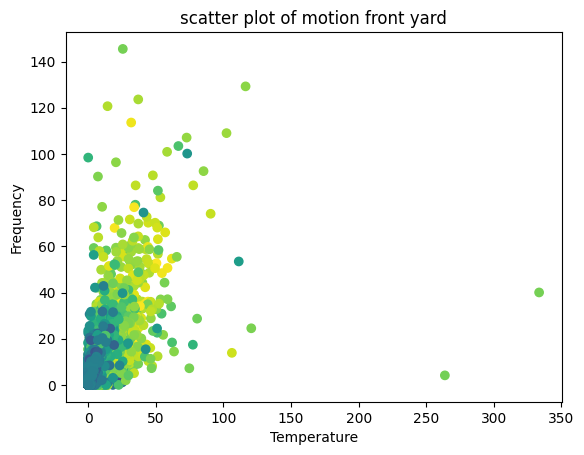

In [157]:
motionFrontYardLeft = readings[:,36]
motionFrontYardRight = readings[:,35]
plt.scatter(motionFrontYardRight,motionFrontYardLeft,c=temps)
plt.title('scatter plot of motion front yard')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

The Colour indicates the outside temperature, showing relationship betwen temperature and frequency.
The plot shows that the motion of sensor or sensitivity is influenced by the temperature 